In [1]:
import pandas as pd
import requests as r
import json
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
csv = 'cityid.csv'

In [3]:
df = pd.read_csv(csv, encoding='utf-8')

/Users/gta/dev/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
city_list = df.sample(500).reset_index()['id'].tolist()

url = 'http://api.openweathermap.org/data/2.5/weather?id='
api_key = '&APPID=0c715aff73757bce5f32aba6da14fd45'
units = '&units=imperial'

url_list = [(url + str(city) + units + api_key) for city in city_list]
url_dict = {'city_id': city_list, 'url': url_list}

city_df = pd.DataFrame(url_dict)

In [5]:
city_df['city'] = ''
city_df['country'] = ''
city_df['lat'] = ''
city_df['lon'] = ''
city_df['temp'] = ''
city_df['wind'] = ''
city_df['clouds'] = ''
city_df['humidity'] = ''

In [6]:
city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,5340674,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
1,3090470,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
2,1768664,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
3,691016,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
4,3703818,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,


In [7]:
city_df['url'][4]

'http://api.openweathermap.org/data/2.5/weather?id=3703818&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45'

In [8]:
i = 0
print('------Start Collecting Data------')
for index, row in city_df.iterrows():
    response = r.get(row['url']).json()    
#     print(response)
    date_time_now = datetime.datetime.now()
    #now.strftime("%Y-%m-%d %H:%M")
    print('Record ' + str(i+1) + ' ' + 'Collected at: ' + date_time_now.strftime("%Y-%m-%d %H:%M"))
    print('City Name: ' + response['name'] + ', ' + 'Country Name: ' + response['sys']['country'])
    print(row['url'])
    print('--------------')
    try:
        city_df.set_value(index, "city", response['name'])
        city_df.set_value(index, 'country', response['sys']['country'])
        city_df.set_value(index, 'lat', response['coord']['lat'])
        city_df.set_value(index, 'lon', response['coord']['lon'])
        city_df.set_value(index, 'temp', response['main']['temp_max'])
        city_df.set_value(index, 'wind', response['wind']['speed'])
        city_df.set_value(index, 'clouds', response['clouds']['all'])
        city_df.set_value(index, 'humidity', response['main']['humidity'])
    except:
        print("Missing field... skipping.")
    i += 1
print('------End Collecting Data------')

------Start Collecting Data------
Record 1 Collected at: 2017-12-16 00:21
City Name: Crestline, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5340674&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 2 Collected at: 2017-12-16 00:21
City Name: Nowy Staw, Country Name: PL
http://api.openweathermap.org/data/2.5/weather?id=3090470&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 3 Collected at: 2017-12-16 00:21
City Name: Kampong Kadok, Country Name: MY
http://api.openweathermap.org/data/2.5/weather?id=1768664&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 4 Collected at: 2017-12-16 00:21
City Name: Tulchyn, Country Name: UA
http://api.openweathermap.org/data/2.5/weather?id=691016&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 5 Collected at: 2017-12-16 00:21
City Name: Nuevo Vigia, Country Name: PA
http://api.openweathermap.org/data/2.5/weather?id=3703818&un

Record 41 Collected at: 2017-12-16 00:21
City Name: Mossley, Country Name: GB
http://api.openweathermap.org/data/2.5/weather?id=2642143&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 42 Collected at: 2017-12-16 00:21
City Name: San Nicolas, Country Name: HN
http://api.openweathermap.org/data/2.5/weather?id=3601834&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 43 Collected at: 2017-12-16 00:21
City Name: South Apopka, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4173394&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 44 Collected at: 2017-12-16 00:21
City Name: Coana, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=3124925&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 45 Collected at: 2017-12-16 00:21
City Name: Badolatosa, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=2521417&units=imperial&APPID=0c715aff73757

Record 81 Collected at: 2017-12-16 00:22
City Name: Severac-le-Chateau, Country Name: FR
http://api.openweathermap.org/data/2.5/weather?id=2974699&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 82 Collected at: 2017-12-16 00:22
City Name: Ighram, Country Name: DZ
http://api.openweathermap.org/data/2.5/weather?id=2493605&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 83 Collected at: 2017-12-16 00:22
City Name: Youhao, Country Name: CN
http://api.openweathermap.org/data/2.5/weather?id=2033301&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 84 Collected at: 2017-12-16 00:22
City Name: Nedelisce, Country Name: HR
http://api.openweathermap.org/data/2.5/weather?id=3194559&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 85 Collected at: 2017-12-16 00:22
City Name: Zaratan, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=3104318&units=imperial&APPID=0c715aff7375

Record 121 Collected at: 2017-12-16 00:22
City Name: Servia, Country Name: GR
http://api.openweathermap.org/data/2.5/weather?id=734328&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 122 Collected at: 2017-12-16 00:22
City Name: Santa Olalla, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=3109705&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 123 Collected at: 2017-12-16 00:22
City Name: Kampung Ayer Keroh, Country Name: MY
http://api.openweathermap.org/data/2.5/weather?id=1734753&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 124 Collected at: 2017-12-16 00:22
City Name: Wasserliesch, Country Name: DE
http://api.openweathermap.org/data/2.5/weather?id=2813728&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 125 Collected at: 2017-12-16 00:22
City Name: Melk, Country Name: AT
http://api.openweathermap.org/data/2.5/weather?id=2771682&units=imperial&APPID=0c

Record 161 Collected at: 2017-12-16 00:23
City Name: Highspire, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5193622&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 162 Collected at: 2017-12-16 00:23
City Name: Cotia, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3465284&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 163 Collected at: 2017-12-16 00:23
City Name: Odesskoye, Country Name: RU
http://api.openweathermap.org/data/2.5/weather?id=1496380&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 164 Collected at: 2017-12-16 00:23
City Name: Castiglion Fiorentino, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=3179405&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 165 Collected at: 2017-12-16 00:23
City Name: Portillo, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=3113112&units=imperial&APPID=0

Record 201 Collected at: 2017-12-16 00:23
City Name: Leno, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=3174892&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 202 Collected at: 2017-12-16 00:23
City Name: Brass, Country Name: NG
http://api.openweathermap.org/data/2.5/weather?id=2346734&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 203 Collected at: 2017-12-16 00:23
City Name: Granton, Country Name: AU
http://api.openweathermap.org/data/2.5/weather?id=2164700&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 204 Collected at: 2017-12-16 00:23
City Name: Willmar, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5052916&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 205 Collected at: 2017-12-16 00:23
City Name: Tacuta, Country Name: RO
http://api.openweathermap.org/data/2.5/weather?id=665636&units=imperial&APPID=0c715aff73757bce5f32aba6d

Record 241 Collected at: 2017-12-16 00:23
City Name: Itambacuri, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3460817&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 242 Collected at: 2017-12-16 00:23
City Name: Ponta Pora, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3453150&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 243 Collected at: 2017-12-16 00:23
City Name: Bholath, Country Name: IN
http://api.openweathermap.org/data/2.5/weather?id=1275859&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 244 Collected at: 2017-12-16 00:23
City Name: Nagasaki-shi, Country Name: JP
http://api.openweathermap.org/data/2.5/weather?id=1856177&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 245 Collected at: 2017-12-16 00:23
City Name: Ozarow Mazowiecki, Country Name: PL
http://api.openweathermap.org/data/2.5/weather?id=762769&units=imperial&APPI

Record 281 Collected at: 2017-12-16 00:24
City Name: Kirkkonummi, Country Name: FI
http://api.openweathermap.org/data/2.5/weather?id=649630&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 282 Collected at: 2017-12-16 00:24
City Name: Itako, Country Name: JP
http://api.openweathermap.org/data/2.5/weather?id=2112555&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 283 Collected at: 2017-12-16 00:24
City Name: Tacurong, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1684681&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 284 Collected at: 2017-12-16 00:24
City Name: Sassandra, Country Name: CI
http://api.openweathermap.org/data/2.5/weather?id=2281951&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 285 Collected at: 2017-12-16 00:24
City Name: Clinton Stock Yards, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4852052&units=imperial&APPID=0c

Record 321 Collected at: 2017-12-16 00:24
City Name: Vorzel, Country Name: UA
http://api.openweathermap.org/data/2.5/weather?id=688956&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 322 Collected at: 2017-12-16 00:24
City Name: Dinagat, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1714795&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 323 Collected at: 2017-12-16 00:24
City Name: Monbon, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1699347&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 324 Collected at: 2017-12-16 00:24
City Name: Azul, Country Name: AR
http://api.openweathermap.org/data/2.5/weather?id=3436199&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 325 Collected at: 2017-12-16 00:24
City Name: Radhanpur, Country Name: IN
http://api.openweathermap.org/data/2.5/weather?id=1259069&units=imperial&APPID=0c715aff73757bce5f32ab

Record 361 Collected at: 2017-12-16 00:25
City Name: Selogiri, Country Name: ID
http://api.openweathermap.org/data/2.5/weather?id=1627969&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 362 Collected at: 2017-12-16 00:25
City Name: Carleton, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4988024&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 363 Collected at: 2017-12-16 00:25
City Name: Bereznehuvate, Country Name: UA
http://api.openweathermap.org/data/2.5/weather?id=712339&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 364 Collected at: 2017-12-16 00:25
City Name: Mondsee, Country Name: AT
http://api.openweathermap.org/data/2.5/weather?id=2771277&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 365 Collected at: 2017-12-16 00:25
City Name: Brampton, Country Name: CA
http://api.openweathermap.org/data/2.5/weather?id=5907364&units=imperial&APPID=0c715aff73

Record 401 Collected at: 2017-12-16 00:25
City Name: Taranagar, Country Name: IN
http://api.openweathermap.org/data/2.5/weather?id=1254908&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 402 Collected at: 2017-12-16 00:25
City Name: Gobernador Mansilla, Country Name: AR
http://api.openweathermap.org/data/2.5/weather?id=3433747&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 403 Collected at: 2017-12-16 00:25
City Name: Falset, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=3122656&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 404 Collected at: 2017-12-16 00:25
City Name: Pargaresti, Country Name: RO
http://api.openweathermap.org/data/2.5/weather?id=670768&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 405 Collected at: 2017-12-16 00:25
City Name: Coteana, Country Name: RO
http://api.openweathermap.org/data/2.5/weather?id=680520&units=imperial&APPID=0c71

Record 441 Collected at: 2017-12-16 00:25
City Name: Snina, Country Name: SK
http://api.openweathermap.org/data/2.5/weather?id=723559&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 442 Collected at: 2017-12-16 00:25
City Name: Southampton, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4951582&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 443 Collected at: 2017-12-16 00:25
City Name: Altea, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=2521804&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 444 Collected at: 2017-12-16 00:25
City Name: Broccostella, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=6534717&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 445 Collected at: 2017-12-16 00:25
City Name: Communal, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1717066&units=imperial&APPID=0c715aff73757

Record 481 Collected at: 2017-12-16 00:26
City Name: Zhangjiajie, Country Name: CN
http://api.openweathermap.org/data/2.5/weather?id=1813171&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 482 Collected at: 2017-12-16 00:26
City Name: San Paolo dArgon, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=6534511&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 483 Collected at: 2017-12-16 00:26
City Name: Tirhanimine, Country Name: MA
http://api.openweathermap.org/data/2.5/weather?id=2527645&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 484 Collected at: 2017-12-16 00:26
City Name: Agaete, Country Name: ES
http://api.openweathermap.org/data/2.5/weather?id=2522423&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 485 Collected at: 2017-12-16 00:26
City Name: Tualatin, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5757506&units=imperial&APPID=0

In [9]:
city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,5340674,http://api.openweathermap.org/data/2.5/weather...,Crestline,US,34.24,-117.29,55.4,1.9,1,22
1,3090470,http://api.openweathermap.org/data/2.5/weather...,Nowy Staw,PL,54.14,19.01,33.8,8.05,75,100
2,1768664,http://api.openweathermap.org/data/2.5/weather...,Kampong Kadok,MY,6,102.25,86,10.29,75,74
3,691016,http://api.openweathermap.org/data/2.5/weather...,Tulchyn,UA,48.67,28.85,44.09,17.22,48,92
4,3703818,http://api.openweathermap.org/data/2.5/weather...,Nuevo Vigia,PA,9.24,-79.61,75.2,5.14,20,100


In [10]:
city_df.shape

(500, 10)

In [11]:
city_lat_list = city_df['lat'].tolist()
city_temp_list = city_df['temp'].tolist()
city_humidity_list = city_df['humidity'].tolist()
city_windspeed_list = city_df['wind'].tolist()
city_cloud_list = city_df['clouds'].tolist()

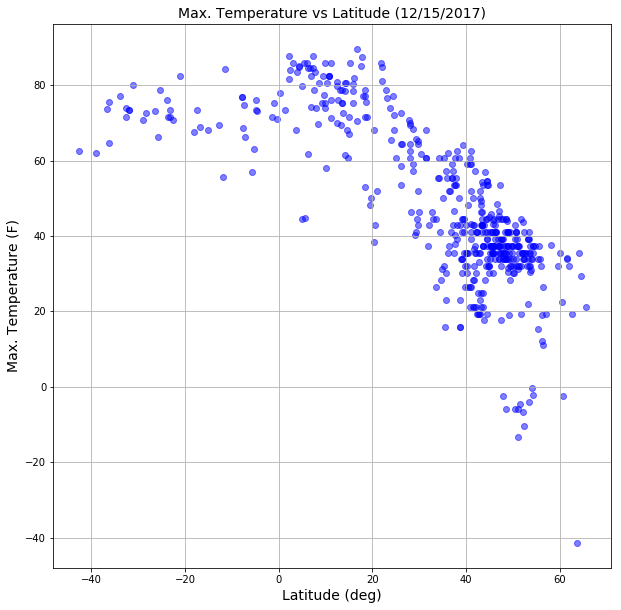

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_temp_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Max. Temperature (F)", fontsize = 14)
plt.title("Max. Temperature vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

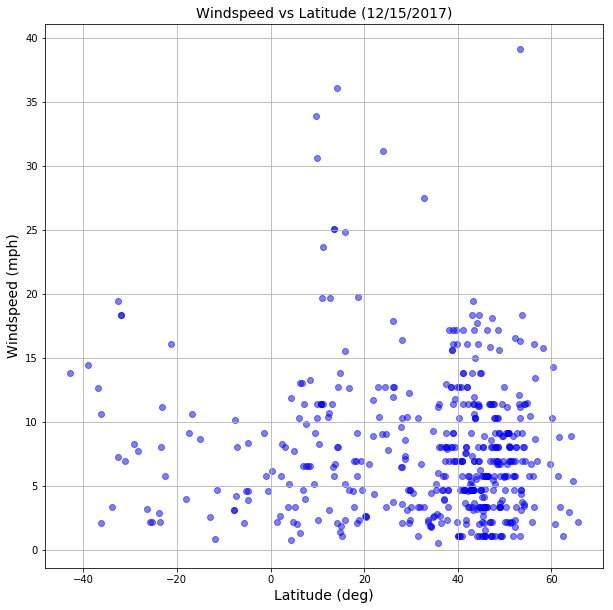

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_windspeed_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Windspeed (mph)", fontsize = 14)
plt.title("Windspeed vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

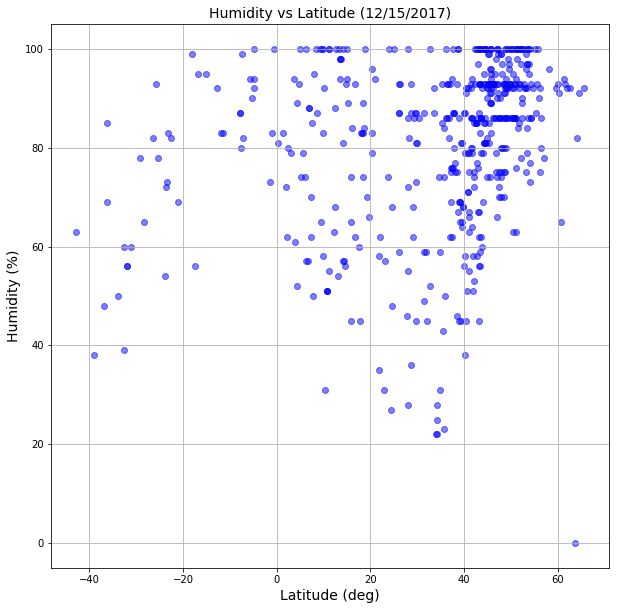

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_humidity_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.title("Humidity vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()

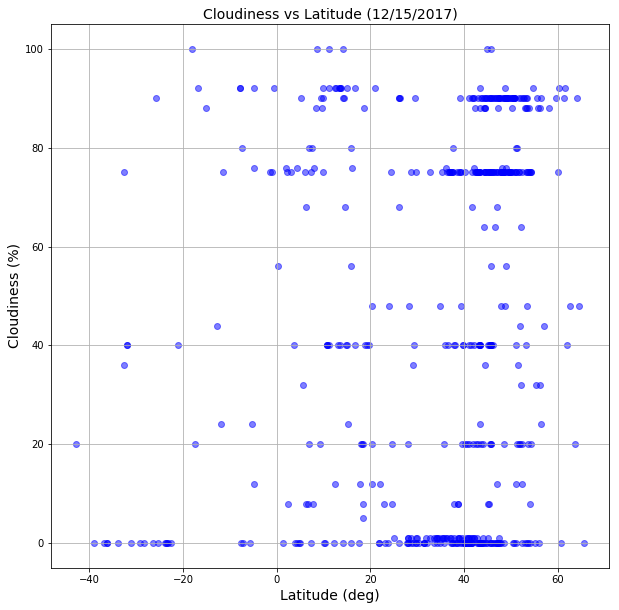

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(city_lat_list, city_cloud_list, color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.title("Cloudiness vs Latitude (12/15/2017)", fontsize = 14)
plt.grid(True)
plt.show()